In [269]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [270]:
housing_data = pd.read_csv("cleaned_housing_data.csv")

In [273]:
housing_data.shape

(4957, 19)

In [274]:
housing_data.dtypes

MLS                           int64
sold_price                  float64
zipcode                       int64
longitude                   float64
latitude                    float64
lot_acres                   float64
taxes                       float64
year_built                    int64
bedrooms                      int64
bathrooms                   float64
sqrt_ft                     float64
garage                      float64
kitchen_features             object
fireplaces                    int64
floor_covering               object
HOA                         float64
years_since_built             int64
kitchen_features_cluster      int64
floor_covering_cluster        int64
dtype: object

In [275]:
test_size = int(len(housing_data) * 0.10)
train_df = housing_data.iloc[:-test_size]
test_df = housing_data.iloc[-test_size:]
print("Train_data: ",train_df.shape)
print("Test_data: ",test_df.shape)

Train_data:  (4462, 19)
Test_data:  (495, 19)


In [276]:
min_lat = train_df['latitude'].min()
max_lat = train_df['latitude'].max()
min_lon = train_df['longitude'].min()
max_lon = train_df['longitude'].max()

min_tax = train_df['taxes'].min()
max_tax = train_df['taxes'].max()

In [277]:


train_df['latitude'] = ((train_df['latitude'] - min_lat) / (max_lat - min_lat))
train_df['longitude'] = ((train_df['longitude'] - min_lon) / (max_lon - min_lon))


test_df['latitude'] = ((test_df['latitude'] - min_lat) / (max_lat - min_lat))
test_df['longitude'] = ((test_df['longitude'] - min_lon) / (max_lon - min_lon))

<ipython-input-277-dc30694da676>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['latitude'] = ((train_df['latitude'] - min_lat) / (max_lat - min_lat))
<ipython-input-277-dc30694da676>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['longitude'] = ((train_df['longitude'] - min_lon) / (max_lon - min_lon))
<ipython-input-277-dc30694da676>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [278]:
train_df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,years_since_built,kitchen_features_cluster,floor_covering_cluster
0,21530491,5300000.0,85637,0.698727,0.000000,2154.00,0.000432,1941,13,10.0,10500.00000,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0.0,78,9,6
1,21529082,4200000.0,85646,0.481090,0.066597,1707.00,0.000853,1997,2,2.0,7300.00000,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0.0,22,4,4
2,3054672,4200000.0,85646,0.482612,0.066773,1707.00,0.000858,1997,2,3.0,2678.59434,0.0,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",0.0,22,4,4
3,21919321,4500000.0,85646,0.484172,0.081062,636.67,0.000689,1930,7,5.0,9019.00000,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",0.0,89,2,6
4,21306357,3411450.0,85750,0.556641,0.260057,3.21,0.001260,1995,4,6.0,6396.00000,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55.0,24,0,0


### Binning price per sq ft and building classification model on that

In [279]:
# Know why you are making 10 bins. ggive specific reason for it
classify_data = train_df[['latitude', 'longitude', 'sold_price', 'sqrt_ft']].copy()

In [280]:
classify_data

,latitude,longitude,sold_price,sqrt_ft
0,0.000000,0.698727,5300000.0,10500.00000
1,0.066597,0.481090,4200000.0,7300.00000
2,0.066773,0.482612,4200000.0,2678.59434
3,0.081062,0.484172,4500000.0,9019.00000
4,0.260057,0.556641,3411450.0,6396.00000
...,...,...,...,...
4457,0.261743,0.527989,560000.0,2948.00000
4458,0.253524,0.532823,538000.0,3128.00000
4459,0.253981,0.581361,575000.0,3040.00000
4460,0.269987,0.542652,568000.0,3280.00000


In [281]:
classify_data['price_per_sqft'] = np.round(classify_data['sold_price']/classify_data['sqrt_ft'], 2)

In [ ]:
bin_counts

0      20
1    1982
2    2176
3     194
4      90
Name: price_per_sqft_bin, dtype: int64

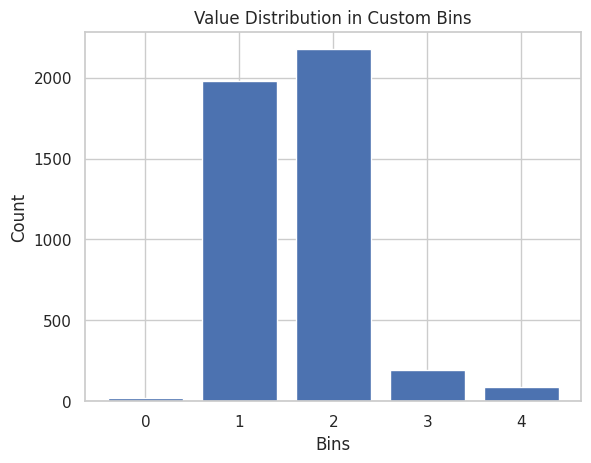

In [282]:
# Define custom bin edges and labels

bins = list(range(0,500,100)) + [float('inf')]
labels = list(range(0,5))

# Use pandas cut to bin the values
classify_data['price_per_sqft_bin'] = pd.cut(classify_data['price_per_sqft'], bins=bins, labels=labels)

# Group by the 'bin' column and count the occurrences in each bin
bin_counts = classify_data['price_per_sqft_bin'].value_counts().sort_index()

# Create a bar chart
plt.bar(bin_counts.index.astype(int), bin_counts.values)
plt.xlabel('Bins')
plt.ylabel('Count')
plt.title('Value Distribution in Custom Bins')
plt.xticks(bin_counts.index.astype(int))
plt.savefig("5_custom_bins.png", dpi=300)
plt.show()

In [ ]:
classify_data['price_per_sqft_bin'].unique()

[4, 1, 2, 3, 0]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [283]:
from sklearn.model_selection import train_test_split
test_size = 0.1
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(classify_data[['latitude','longitude']], classify_data['price_per_sqft_bin'], test_size=test_size, random_state=random_seed, stratify=classify_data['price_per_sqft_bin'])

In [284]:
X_train = X_train.round(2)
X_test = X_test.round(2)

In [285]:
X_test.head()

,latitude,longitude
1512,0.27,0.52
3353,0.31,0.51
2139,0.30,0.50
2893,0.15,0.51
1137,0.33,0.54


In [ ]:
# classify_test_size = int(len(classify_data) * 0.1)
# classify_data_train = classify_data.iloc[:-classify_test_size]
# classify_data_test = classify_data.iloc[-classify_test_size:]

In [286]:
classify_data_train_X = X_train[['latitude','longitude']].values
classify_data_train_y = y_train.values
classify_data_test_X = X_test[['latitude','longitude']].values
classify_data_test_y = y_test.values

In [287]:
classify_data_train_X

array([[0.26, 0.58],
       [0.27, 0.56],
       [0.27, 0.54],
       ...,
       [0.27, 0.52],
       [0.26, 0.58],
       [0.33, 0.54]])

In [288]:
set(classify_data_train_y)

{0, 1, 2, 3, 4}

In [289]:
print("classify_data_train X: ",classify_data_train_X.shape)
print("classify_data_train y: ",classify_data_train_y.shape)
print("classify_data_test_X: ",classify_data_test_X.shape)
print("classify_data_test_y: ",classify_data_test_y.shape)

classify_data_train X:  (4015, 2)
classify_data_train y:  (4015,)
classify_data_test_X:  (447, 2)
classify_data_test_y:  (447,)


In [290]:
def accuracy(y, y_hat):
    return np.mean(y==y_hat)

### Bayesian classification

In [291]:
from scipy.stats import multivariate_normal as mvn
class GaussNB():

    def fit(self, X, y, epsilon = 1e-3):

        self.likelihoods = dict()
        self.priors = dict()

        self.K = set(y.astype(int))

        for k in self.K:
            # _ is used for subscripts
            X_k = X[y==k,:]
            self.likelihoods[k] = {"mean": X_k.mean(axis=0), "cov":X_k.var(axis=0)+ epsilon}
            self.priors[k] = len(X_k)/len(X)

    def predict(self, X):

        N, D = X.shape
        P_hat = np.zeros((N,len(self.K)))

        for k, l in self.likelihoods.items():
        # Applying Bayes theorem

            P_hat[:,k] = mvn.logpdf(X, l['mean'], l['cov']) + np.log(self.priors[k])
        return P_hat.argmax(axis=1)

In [292]:
gnb = GaussNB()
gnb.fit(classify_data_train_X,classify_data_train_y)
y_hat = gnb.predict(classify_data_test_X)

In [293]:
accuracy(classify_data_test_y, y_hat)

0.5369127516778524

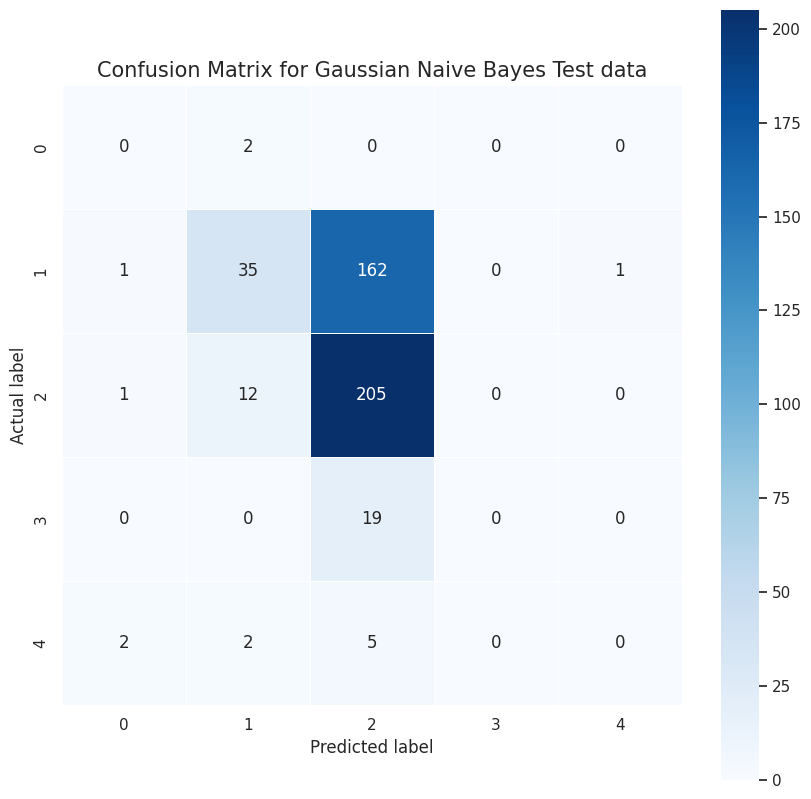

In [294]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Generate the confusion matrix
cm = confusion_matrix(classify_data_test_y, y_hat)

# Plotting the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for Gaussian Naive Bayes Test data', size = 15)
# plt.savefig('./Confusion Matrix standard gnb.png', dpi=300)
plt.show()

In [295]:
class GausBayes():

    def fit(self, X, y, epsilon=1e-3):
        self.likelihoods = dict()
        self.priors = dict()

        self.K = set(y.astype(int))
        for k in self.K:
          X_k = X[y==k,:]
          N_k, D = X_k.shape
          mu_k = X_k.mean(axis=0)

          self.likelihoods[k] = {"mean": X_k.mean(axis=0),
                                 "cov": (1/(N_k-1))*np.matmul((X_k-mu_k).T, X_k-mu_k)+ epsilon*np.identity(D)}
          self.priors[k] = len(X_k)/len(X)

    def predict(self, X):
        N, D = X.shape
        P_hat = np.zeros((N,len(self.K)))
        for k,l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])

        return P_hat.argmax(axis=1)

In [296]:
gb = GausBayes()
gb.fit(classify_data_train_X,classify_data_train_y)
y_hat2 = gb.predict(classify_data_test_X)

In [297]:
accuracy(classify_data_test_y, y_hat2)

0.5346756152125279

In [298]:
class KNNClassifier():

  def fit(self, X, y):
    self.X=X
    self.y=y

  def predict(self, X, K, epsilon =1e-3):
    N=len(X)
    y_hat = np.zeros(N)
    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt  = np.argsort(dist2)[:K]
      gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))
      y_hat[i] = np.bincount(self.y[idxt], weights= gamma_k).argmax()
    return y_hat

In [299]:
knn = KNNClassifier()
knn.fit(classify_data_train_X,classify_data_train_y)
y_hat = knn.predict(classify_data_train_X,3)

In [300]:
accuracy(classify_data_train_y, y_hat)

0.5414694894146949

### House price prediction

In [301]:
def normalize(df, feature):
    mini = df[feature].min()
    maxi = df[feature].max()
    df[feature] = (df[feature] - mini) / (maxi - mini)
    return df

In [302]:
housing_data['Bed_Bath'] = housing_data['bedrooms'] + housing_data['bathrooms'].astype(int)


In [303]:
housing_data['HOA_cat'] = 0
housing_data.loc[housing_data['HOA'] > 0, 'HOA_cat'] = 1


In [304]:
housing_data = normalize(housing_data,'Bed_Bath')
housing_data = normalize(housing_data,'latitude')
housing_data = normalize(housing_data,'longitude')
housing_data = normalize(housing_data,'years_since_built')
housing_data = normalize(housing_data,'HOA_cat')
housing_data = normalize(housing_data,'taxes')
housing_data = normalize(housing_data,'kitchen_features_cluster')
housing_data = normalize(housing_data,'floor_covering_cluster')
housing_data = normalize(housing_data,'garage')
housing_data = normalize(housing_data,'sqrt_ft')

In [305]:
housing_data.dtypes

MLS                           int64
sold_price                  float64
zipcode                       int64
longitude                   float64
latitude                    float64
lot_acres                   float64
taxes                       float64
year_built                    int64
bedrooms                      int64
bathrooms                   float64
sqrt_ft                     float64
garage                      float64
kitchen_features             object
fireplaces                    int64
floor_covering               object
HOA                         float64
years_since_built           float64
kitchen_features_cluster    float64
floor_covering_cluster      float64
Bed_Bath                    float64
HOA_cat                     float64
dtype: object

In [306]:
housing_data[["latitude","longitude","HOA_cat", "Bed_Bath", "taxes", "sqrt_ft","years_since_built","kitchen_features_cluster","floor_covering_cluster", "sold_price"]].corr()

,latitude,longitude,HOA_cat,Bed_Bath,taxes,sqrt_ft,years_since_built,kitchen_features_cluster,floor_covering_cluster,sold_price
latitude,1.000000,-0.260745,0.177750,-0.089555,0.000652,-0.113737,-0.081686,-0.059400,-0.101638,0.031299
longitude,-0.260745,1.000000,-0.040835,0.040021,-0.001006,0.058091,0.008613,0.005997,0.044706,-0.037055
HOA_cat,0.177750,-0.040835,1.000000,-0.122484,0.008860,-0.081700,-0.090631,-0.112528,-0.126930,0.048200
Bed_Bath,-0.089555,0.040021,-0.122484,1.000000,0.008014,0.744737,0.082310,0.039716,0.074140,0.248503
taxes,0.000652,-0.001006,0.008860,0.008014,1.000000,0.037228,-0.000025,-0.012741,0.014672,0.023278
sqrt_ft,-0.113737,0.058091,-0.081700,0.744737,0.037228,1.000000,0.048932,0.023896,0.112464,0.512096
years_since_built,-0.081686,0.008613,-0.090631,0.082310,-0.000025,0.048932,1.000000,0.050322,0.063654,0.013500
kitchen_features_cluster,-0.059400,0.005997,-0.112528,0.039716,-0.012741,0.023896,0.050322,1.000000,0.034734,-0.016857
floor_covering_cluster,-0.101638,0.044706,-0.126930,0.074140,0.014672,0.112464,0.063654,0.034734,1.000000,0.074760
sold_price,0.031299,-0.037055,0.048200,0.248503,0.023278,0.512096,0.013500,-0.016857,0.074760,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

<Figure size 640x480 with 0 Axes>

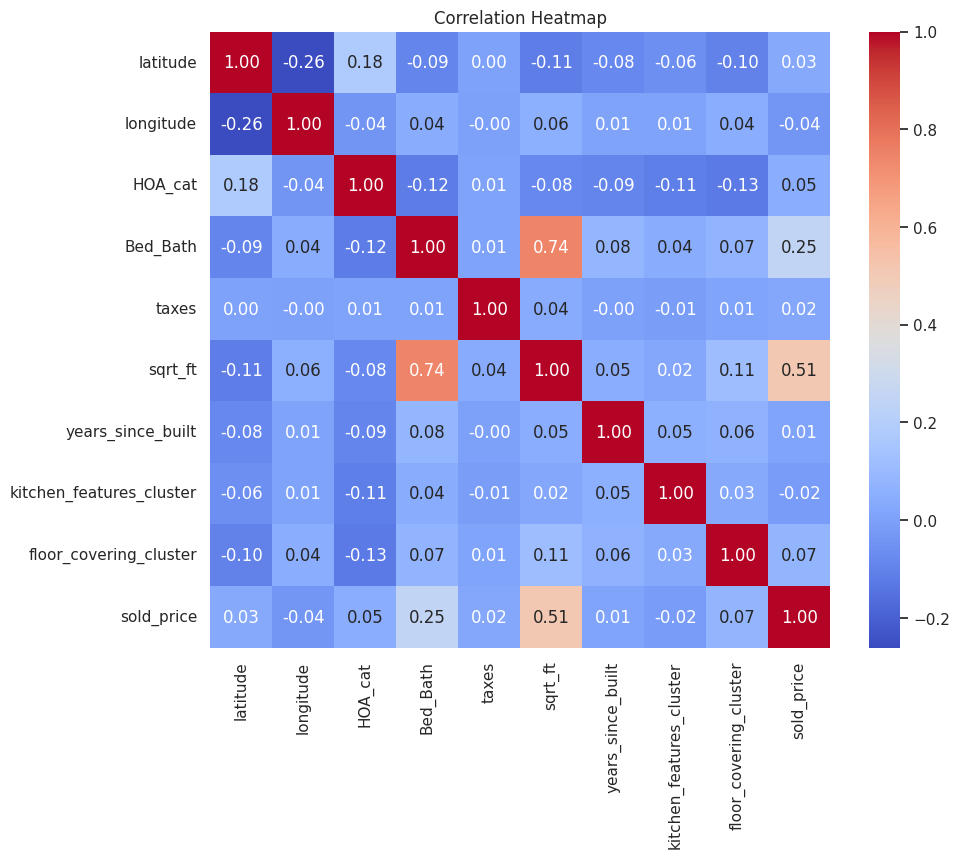

In [307]:
import seaborn as sns
sns.set(style="whitegrid")


columns_to_plot = ["latitude","longitude","HOA_cat", "Bed_Bath", "taxes", "sqrt_ft","years_since_built","kitchen_features_cluster","floor_covering_cluster", "sold_price"]

plt.tight_layout()
plt.figure(figsize=(10, 8))
# Creating a correlation heatmap for the numerical columns
correlation_matrix = housing_data[columns_to_plot].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")

# plt.savefig('./correlation_heatmap.png', dpi=300)

# plt.show()

In [308]:
housing_data

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,...,garage,kitchen_features,fireplaces,floor_covering,HOA,years_since_built,kitchen_features_cluster,floor_covering_cluster,Bed_Bath,HOA_cat
0,21530491,5300000.0,85637,0.698727,0.000000,2154.00,0.000432,1941,13,10.0,...,0.000000,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0.0,0.038633,1.000000,0.666667,0.304348,0.0
1,21529082,4200000.0,85646,0.481090,0.066597,1707.00,0.000853,1997,2,2.0,...,0.000000,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0.0,0.010896,0.444444,0.444444,0.028986,0.0
2,3054672,4200000.0,85646,0.482612,0.066773,1707.00,0.000858,1997,2,3.0,...,0.000000,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",0.0,0.010896,0.444444,0.444444,0.043478,0.0
3,21919321,4500000.0,85646,0.484172,0.081062,636.67,0.000689,1930,7,5.0,...,0.133333,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",0.0,0.044081,0.222222,0.666667,0.144928,0.0
4,21306357,3411450.0,85750,0.556641,0.260057,3.21,0.001260,1995,4,6.0,...,0.100000,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55.0,0.011887,0.000000,0.000000,0.115942,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4952,21810382,495000.0,85641,0.606205,0.154431,4.98,0.000165,2005,5,3.0,...,0.100000,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0.0,0.006934,0.888889,0.222222,0.086957,0.0
4953,21908591,550000.0,85750,0.542031,0.268796,1.42,0.000395,1990,4,3.0,...,0.100000,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43.0,0.014364,0.333333,0.222222,0.072464,1.0
4954,21832452,475000.0,85192,0.575672,0.450325,12.06,0.000082,1969,3,2.0,...,0.000000,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,0.0,0.024765,0.888889,0.333333,0.043478,0.0
4955,21900515,550000.0,85745,0.477777,0.263336,1.01,0.000477,2009,4,4.0,...,0.100000,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",0.0,0.004953,0.666667,0.222222,0.086957,0.0


In [309]:
test_size = int(len(housing_data) * 0.10)
train_df = housing_data.iloc[:-test_size]
test_df = housing_data.iloc[-test_size:]
print("Train_data: ",train_df.shape)
print("Test_data: ",test_df.shape)

Train_data:  (4462, 21)
Test_data:  (495, 21)


In [310]:
X_train = train_df[["latitude","longitude","HOA_cat", "Bed_Bath", "taxes", "sqrt_ft","years_since_built","kitchen_features_cluster","floor_covering_cluster"]].values
y_train = train_df["sold_price"].values
X_test = test_df[["latitude","longitude","HOA_cat", "Bed_Bath", "taxes", "sqrt_ft","years_since_built","kitchen_features_cluster","floor_covering_cluster"]].values
y_test = test_df["sold_price"].values

In [311]:
print("classify_data_train X: ",X_train.shape)
print("classify_data_train y: ",y_train.shape)
print("classify_data_test_X: ",X_test.shape)
print("classify_data_test_y: ",y_test.shape)

classify_data_train X:  (4462, 9)
classify_data_train y:  (4462,)
classify_data_test_X:  (495, 9)
classify_data_test_y:  (495,)


In [312]:
def OLS(Y, Y_hat, N):
    N = Y_hat.shape[0]
    return ((1/(2*N))*np.sum((Y-Y_hat)**2))

In [313]:
class KNNRegressor():

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X, K, epsilon=1e-3):
        N = len(X)
        y_hat = np.zeros(N)

        for i in range(N):
            dist2 = np.sum((self.X-X[i])**2, axis=1)
            idxt = np.argsort(dist2)[:K]
            gamma_k = np.exp(-dist2[idxt])/np.exp(-dist2[idxt]).sum()
            y_hat[i] = gamma_k.dot(self.y[idxt])

        return y_hat



In [314]:
knnr = KNNRegressor()

In [315]:
knnr.fit(X_train,y_train)

In [316]:
y_hat = knnr.predict(X_test, 5)

In [318]:
class MVLinearRegression():

    def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
        N, D = X.shape
        Y = y
        epochs = int(epochs)

        # Begin optimizatio
        self.W = np.random.randn(D) # random initialize
        J = np.zeros(epochs)

        # Stocastic Gradient Descent
        for epoch in range(epochs):
            Y_hat = self.predict(X)
            J[epoch] = OLS(Y, Y_hat, N)
            # Weight update rule
            self.W -= eta*(1/N)*(X.T@(Y_hat-Y))

        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("$\mathcal{J}$")
            plt.title("Training curve")
            plt.show()

    def predict(self, X):
        return X@self.W

In [319]:
my_reg = MVLinearRegression()

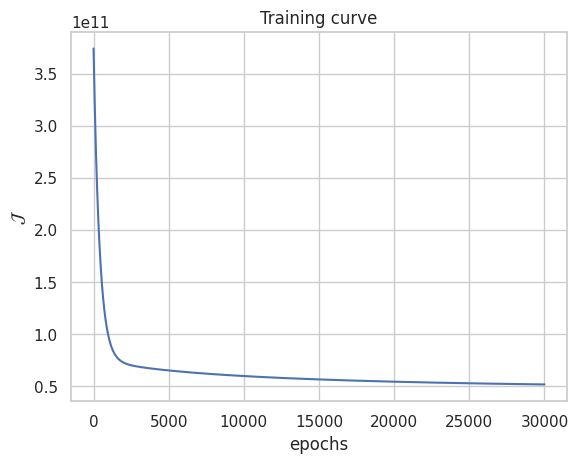

In [320]:
my_reg.fit(X_train.round(2), y_train, eta=1e-3,  epochs=3e4, show_curve=True)

In [321]:
y_hat_SGD = my_reg.predict(X_test)

In [322]:
OLS(y_hat_SGD, y_test, len(y_hat_SGD))

27574186390.31419